In [1]:
#import all libraries
import pandas as pd
import numpy as np
import tensorflow as tf

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#sns.set(style='whitegrid', context = 'notebooks')
#%matplotlib notebook

#misc
import random as rn

#load the dataset
filepath = "/Users/hisay/Desktop/Courses/DSFinance/Data_Science_in_Finance_Resources/DSF_Assignment"
df = pd.read_csv(f"{filepath}/creditcard.csv")
df.head()

2025-03-17 00:32:34.380741: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
#Convert the column into to lower case and rename the class column
df.columns = map(str.lower, df.columns)
df.rename(columns = {'class': 'label'}, inplace = True)
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,label
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Calculate field: log10(amount)
df['log10_amount'] = np.log10(df['amount'] + 0.00001)

# Reorder columns: move 'log10_amount' and 'label' to the end
df = df[[col for col in df if col not in ['label', 'log10_amount']] + ['log10_amount', 'label']]

# Display the first few rows to check the result
df.head()


,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v22,v23,v24,v25,v26,v27,v28,amount,log10_amount,label
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,2.174990,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.429754,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,2.578249,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,2.091667,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,1.845036,0


### Visualizing clusters with t-SNE
t-distributed stochastic neighbour embedding (t-SNE)

In [15]:
#Mannual parameter
RATIO_TO_FRAUD = 15 #What is the rationale behind this??

#dropping the redundant column
df = df.copy()
df1 = df.drop(['time', 'amount'], axis = 1)

#Splitting by class
fraud = df1[df1.label == 1]
clean = df1[df1.label == 0]

#Undersample clean transactions
clean_undersampled = clean.sample(int(len(fraud) * RATIO_TO_FRAUD), random_state = 42)
#RATIO_TO_FRAUD: A predefined constant that determines how many clean transactions 
#you want relative to the number of fraud transactions. 15:1

#concatenate with fraud transactions into a single dataframe
visualization_initial = pd.concat([fraud, clean_undersampled])
column_names = list(visualization_intial.drop('label', axis = 1).columns)

#Isolate feautres from labels
feautres, labels = visualization_intial.drop('label', axis = 1).values,visualization_intial['label'].values

In [17]:
print(f"""The non-fraud dataset has been undersampled from {len(clean):,} to {len(clean_undersampled):,}.
This represents a ratio of {RATIO_TO_FRAUD}:1 to fraud.""")

The non-fraud dataset has been undersampled from 284,315 to 7,380.
This represents a ratio of 15:1 to fraud.


### Visualizing clusters with t-SNE
*t-Distributed Stochastic Neighbout Embedding (t-SNE)*
> t-SNE [1] is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

In plain language, most certainly oversimplifying matters: **t-SNE is a dimensionality reduction technique used for visualizations** of complex datasets. It maps clusters in high-dimensional data to a two or three-dimensional plane so we can get an idea of how easy it will be to discriminate between data points in lower dimensions proportional to the probability that these data points are neighbors in the higher dimensions.

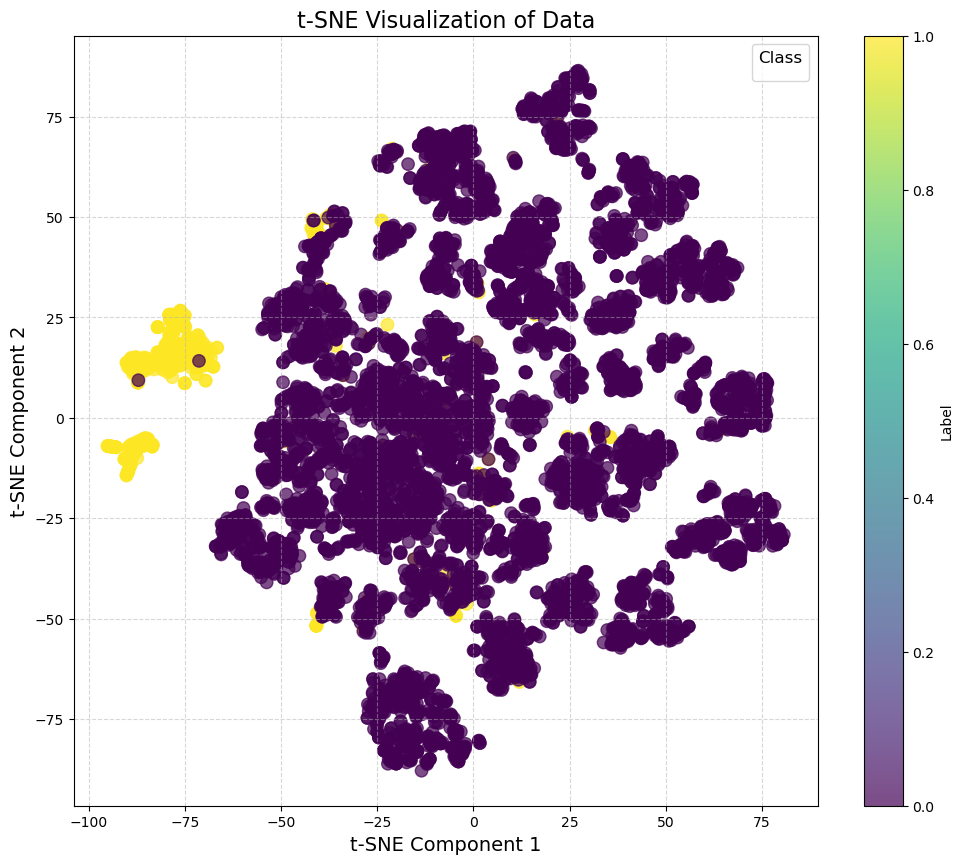

In [125]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.patches as mpatches

# Assuming 'visualization_initial' is a DataFrame with your data,
# where one column is 'label' and the rest are features.
features = visualization_initial.drop('label', axis=1).values
labels = visualization_initial['label'].values

# Perform t-SNE on the features
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features)

def tsne_scatter(tsne_results, labels, save_as=None):
    plt.figure(figsize=(12, 10))
    
    # Scatter plot with increased marker size
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1],
                          c=labels, cmap='viridis', alpha=0.7, s=80)
    plt.colorbar(scatter, label='Label')
    plt.xlabel('t-SNE Component 1', fontsize=14)
    plt.ylabel('t-SNE Component 2', fontsize=14)
    plt.title('t-SNE Visualization of Data', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # Create legend patches dynamically based on unique labels
    unique_labels = np.unique(labels)
    patches = []
    # If you know the mapping, you can adjust the names accordingly.
    label_names = {unique_labels[0]: "Fraud", unique_labels[1]: "Clean"} if len(unique_labels) == 2 else {l: str(l) for l in unique_labels}
    
    for ul in unique_labels:
        color = scatter.cmap(scatter.norm(ul))
        patches.append(mpatches.Patch(color=color, label=label_names.get(ul, str(ul))))
    
    plt.legend(handles=patches, loc='upper right', title='Class', fontsize=12, title_fontsize=12)

    if save_as:
        plt.savefig(save_as, bbox_inches='tight')
        print(f"Plot saved as {save_as}")
    plt.show()

# Call the function to visualize the t-SNE results.
tsne_scatter(tsne_results, labels)  # Optionally, add save_as='tsne_initial_2d.png'

### Train/Validate/Test split

The auto-encoder will only train on transactions that were normal. What's left over will be combined with the fraud set to form our test sample.


In [21]:
print(f"""Shape of the datasets:
clean(rows, cols) = {clean.shape}
fraud(rows, cols) = {fraud.shape}""")

Shape of the datasets:
clean(rows, cols) = (284315, 30)
fraud(rows, cols) = (492, 30)


In [23]:
num_sample = 200000
# shuffle our training set
clean = clean.sample(frac=1).reset_index(drop=True)
# training set: exclusively non-fraud transactions
X_train = clean.iloc[:num_sample].drop('label', axis=1)
# testing  set: the remaining non-fraud + all the fraud 
X_test = pd.concat([clean.iloc[num_sample:], fraud]).sample(frac=1).reset_index(drop=True)

In [25]:
print(f"""Our testing set is composed as follows:

{X_test.label.value_counts()}""")


Our testing set is composed as follows:

label
0    84315
1      492
Name: count, dtype: int64


### Split the datasets into train and validation dataset

In [29]:
from sklearn.model_selection import train_test_split

# Split training data into train and validation sets (since all are clean)
X_train, X_validate = train_test_split(
    X_train, test_size=0.2, random_state=42
)

# Ensure X_test is a DataFrame before splitting labels
X_test = pd.DataFrame(X_test)  # Convert back to DataFrame if needed

# Manually splitting the labels from the test DataFrame
X_test, y_test = X_test.drop(columns=['label']), X_test['label']


In [31]:
print(f"""Shape of datasets:
training (rows, cols) = {X_train.shape}
validate (rows, cols) = {X_validate.shape}
holdout  (rows, cols) = {X_test.shape}""")

Shape of datasets:
training (rows, cols) = (160000, 29)
validate (rows, cols) = (40000, 29)
holdout  (rows, cols) = (84807, 29)


### Normalization and standardization

In [34]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.pipeline import Pipeline

# configure our pipeline
pipeline = Pipeline([('normalizer', Normalizer()),
                     ('scaler', MinMaxScaler())])

In [36]:
# get normalization parameters by fitting to the training data
pipeline.fit(X_train);

In [38]:
# transform the training and validation data with these parameters
X_train_transformed = pipeline.transform(X_train)
X_validate_transformed = pipeline.transform(X_validate)

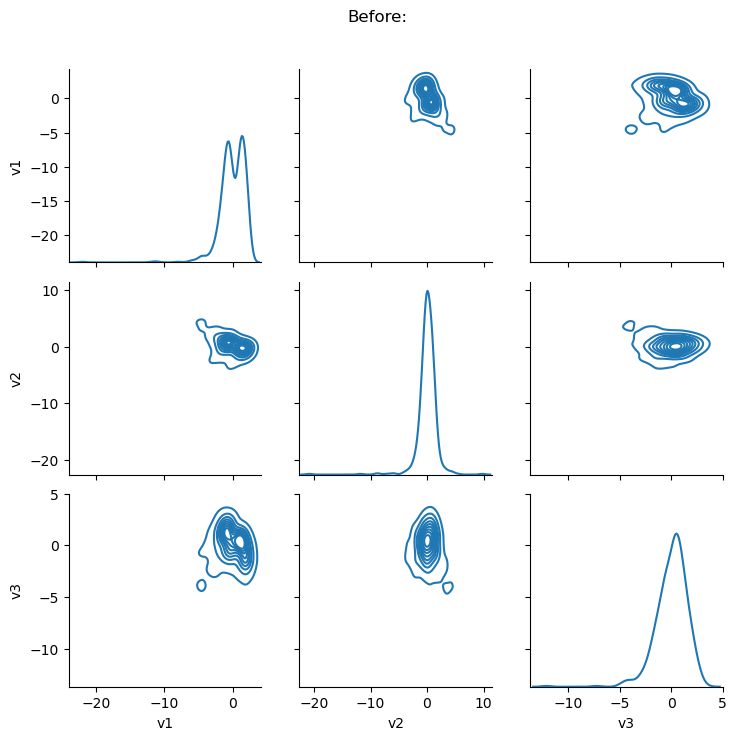

In [42]:
g = sns.PairGrid(X_train.iloc[:,:3].sample(600, random_state=42))
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Before:')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot);

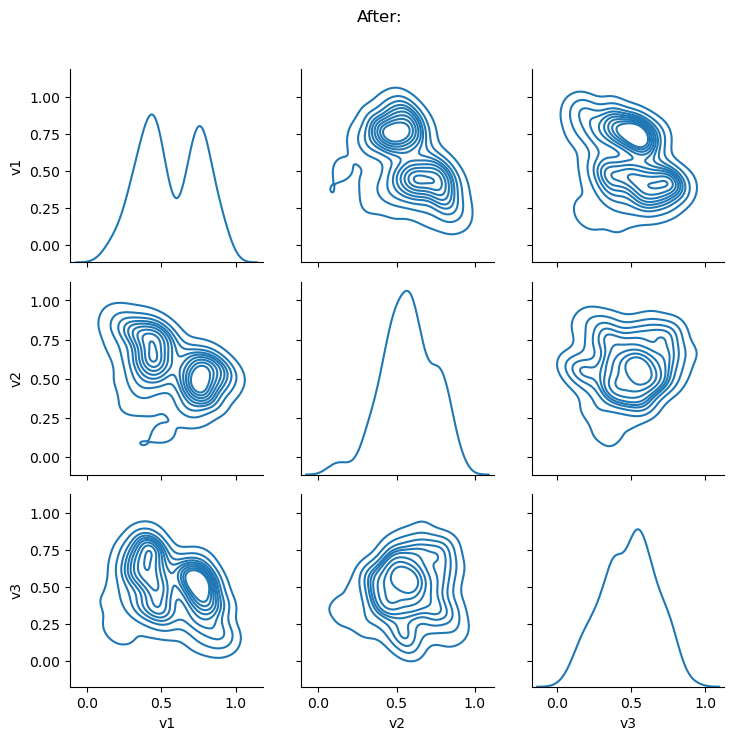

In [46]:
g = sns.PairGrid(pd.DataFrame(X_train_transformed, 
                              columns=column_names).iloc[:,:3].sample(600, random_state=42))
plt.subplots_adjust(top=0.9)
g.fig.suptitle('After:')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot);

### Training the autoencoder

In [138]:
# Load the extension and start TensorBoard
# %load_ext tensorboard
# %tensorboard --logdir logs

### Architecture of model

In [136]:
# data dimensions // hyperparameters 
input_dim = X_train_transformed.shape[1]
BATCH_SIZE = 256
EPOCHS = 100

# https://keras.io/layers/core/
autoencoder = tf.keras.models.Sequential([
    
    # deconstruct / encode
    tf.keras.layers.Dense(input_dim, activation='elu', input_shape=(input_dim, )), 
    tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(2, activation='elu'),
    
    # reconstruction / decode
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dense(input_dim, activation='elu')
    
])

# https://keras.io/api/models/model_training_apis/
autoencoder.compile(optimizer="adam", 
                    loss="mse",
                    metrics=["acc"])

# print an overview of our model
autoencoder.summary();


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                │ (None, 29)             │           870 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 16)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 29)             │           493 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,221 (8.68 KB)

 Trainable params: 2,221 (8.68 KB)

 Non-trainable params: 0 (0.00 B)

In [140]:
# from datetime import datetime
BATCH_SIZE = 256
# current date and time
yyyymmddHHMM = datetime.now().strftime('%Y%m%d%H%M')

# new folder for a new run
log_subdir = f'{yyyymmddHHMM}_batch{BATCH_SIZE}_layers{len(autoencoder.layers)}'

# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True
)

save_model = tf.keras.callbacks.ModelCheckpoint(
    filepath='autoencoder_best_weights.keras',  # New extension
    save_best_only=True,
    monitor='val_loss',
    verbose=0,
    mode='min'
)

tensorboard = tf.keras.callbacks.TensorBoard(
    log_dir=f'logs/{log_subdir}',
    update_freq='batch'
)

# callbacks argument only takes a list
cb = [early_stop, save_model, tensorboard]

In [82]:
history = autoencoder.fit(
    X_train_transformed, X_train_transformed,
    shuffle=True,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=cb,
    validation_data=(X_validate_transformed, X_validate_transformed)
);

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.1600 - loss: 0.0555 - val_acc: 0.2021 - val_loss: 0.0162
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.2352 - loss: 0.0159 - val_acc: 0.2992 - val_loss: 0.0152
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.3164 - loss: 0.0150 - val_acc: 0.3406 - val_loss: 0.0145
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.3396 - loss: 0.0144 - val_acc: 0.3257 - val_loss: 0.0141
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.3227 - loss: 0.0140 - val_acc: 0.3318 - val_loss: 0.0139
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.3275 - loss: 0.0138 - val_acc: 0.3314 - val_loss: 0.0138
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.3304 - loss: 0.0138 - val_acc: 0.3318 - val_loss: 0.0137
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.3348 - loss: 0.0136 - val_acc: 0.3435 - val_loss: 0.0133
Epoch 9/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/

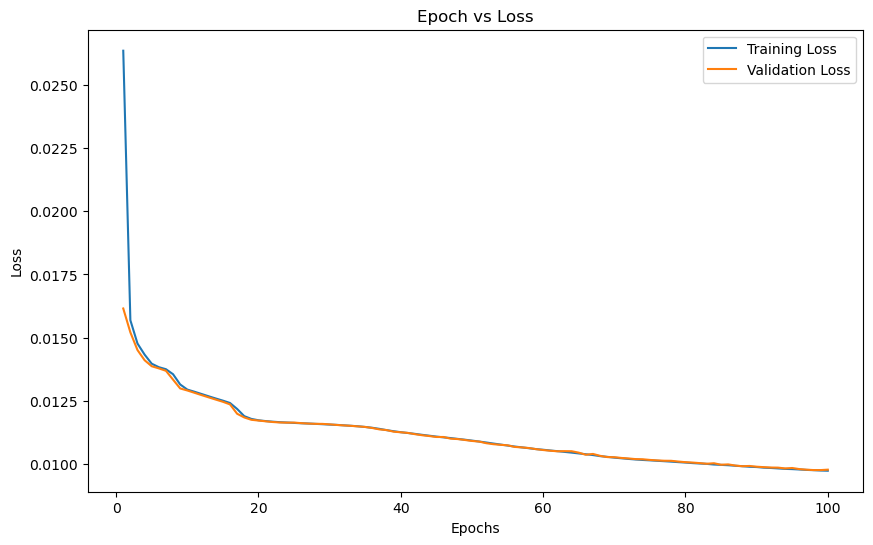

In [144]:
import matplotlib.pyplot as plt

# Extract loss values from history
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.legend()

# Save the plot as an image file
#plt.savefig('loss_plot.png')
plt.show()  # Close the figure so it does not display


### Reconstructions 

We apply the transformation pipeline to our test set. Then, we pass the data through the trained autoencoder.

In [86]:
# transform the test set with the pipeline fitted to the training set
X_test_transformed = pipeline.transform(X_test)

# pass the transformed test set through the autoencoder to get the reconstructed result
reconstructions = autoencoder.predict(X_test_transformed)


2651/2651 ━━━━━━━━━━━━━━━━━━━━ 2s 686us/step


In [146]:
# calculating the mean squared error reconstruction loss per row in the numpy array
mse = np.mean(np.power(X_test_transformed - reconstructions, 2), axis=1)

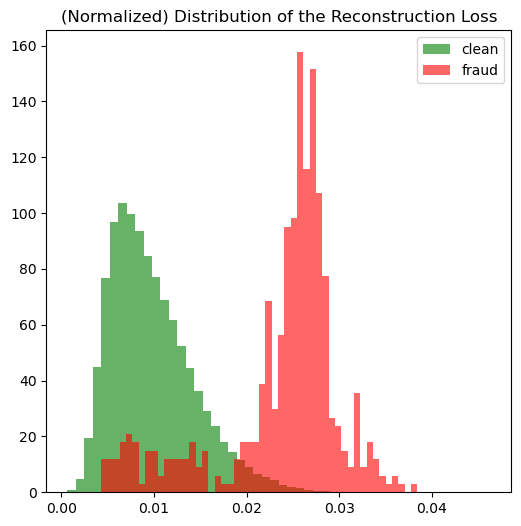

In [148]:
clean = mse[y_test==0]
fraud = mse[y_test==1]

fig, ax = plt.subplots(figsize=(6,6))

ax.hist(clean, bins=50, density=True, label="clean", alpha=.6, color="green")
ax.hist(fraud, bins=50, density=True, label="fraud", alpha=.6, color="red")

plt.title("(Normalized) Distribution of the Reconstruction Loss")
plt.legend()
plt.show()

Very promising! Although some transactions seem to fool the autoencoder, the fraudulent transactions clearly have a distinguishing element in their data that sets them apart from clean ones.

In [93]:
THRESHOLD = 3

def mad_score(points):
    """https://www.itl.nist.gov/div898/handbook/eda/section3/eda35h.htm """
    m = np.median(points)
    ad = np.abs(points - m)
    mad = np.median(ad)
    
    return 0.6745 * ad / mad

z_scores = mad_score(mse)
outliers = z_scores > THRESHOLD

In [95]:
print(f"Detected {np.sum(outliers):,} outliers in a total of {np.size(z_scores):,} transactions [{np.sum(outliers)/np.size(z_scores):.2%}].")

Detected 1,669 outliers in a total of 84,807 transactions [1.97%].


In [97]:
from sklearn.metrics import (confusion_matrix, 
                             precision_recall_curve)

# get (mis)classification
cm = confusion_matrix(y_test, outliers)

# true/false positives/negatives
(tn, fp, 
 fn, tp) = cm.flatten()

In [99]:
print(f"""The classifications using the MAD method with threshold={THRESHOLD} are as follows:
{cm}

% of transactions labeled as fraud that were correct (precision): {tp}/({fp}+{tp}) = {tp/(fp+tp):.2%}
% of fraudulent transactions were caught succesfully (recall):    {tp}/({fn}+{tp}) = {tp/(fn+tp):.2%}""")

The classifications using the MAD method with threshold=3 are as follows:
[[83029  1286]
 [  109   383]]

% of transactions labeled as fraud that were correct (precision): 383/(1286+383) = 22.95%
% of fraudulent transactions were caught succesfully (recall):    383/(109+383) = 77.85%


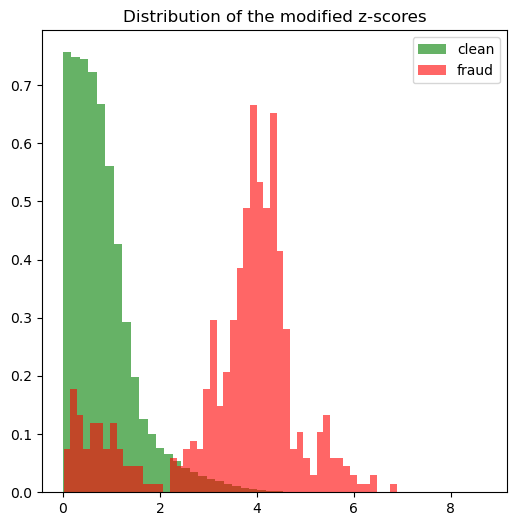

In [101]:
clean = z_scores[y_test==0]
fraud = z_scores[y_test==1]

fig, ax = plt.subplots(figsize=(6,6))

ax.hist(clean, bins=50, density=True, label="clean", alpha=.6, color="green")
ax.hist(fraud, bins=50, density=True, label="fraud", alpha=.6, color="red")

plt.title("Distribution of the modified z-scores")
plt.legend()
plt.show()

### Latent space

### Encoder

In [104]:
encoder = tf.keras.models.Sequential(autoencoder.layers[:5])
encoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 29)             │           870 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,532 (5.98 KB)

 Trainable params: 1,532 (5.98 KB)

 Non-trainable params: 0 (0.00 B)

In [106]:
# taking all the fraud, undersampling clean
fraud = X_test_transformed[y_test==1]
clean = X_test_transformed[y_test==0][:len(fraud) * RATIO_TO_FRAUD, ]

# combining arrays & building labels
features = np.append(fraud, clean, axis=0)
labels = np.append(np.ones(len(fraud)),
                   np.zeros(len(clean)))

# getting latent space representation
latent_representation = encoder.predict(features)

print(f'Clean transactions downsampled from {len(X_test_transformed[y_test==0]):,} to {len(clean):,}.')
print('Shape of latent representation:', latent_representation.shape)


246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step
Clean transactions downsampled from 84,315 to 7,380.
Shape of latent representation: (7872, 2)


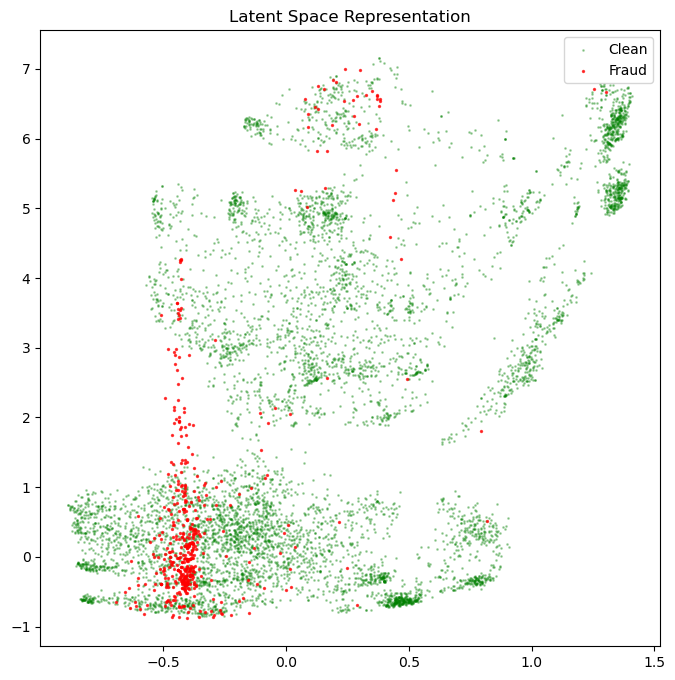

In [108]:
X = latent_representation[:,0]
y = latent_representation[:,1]

# plotting
plt.subplots(figsize=(8, 8))
plt.scatter(X[labels==0], y[labels==0], s=1, c='g', alpha=0.3, label='Clean')
plt.scatter(X[labels==1], y[labels==1], s=2, c='r', alpha=0.7, label='Fraud')

# labeling
plt.legend(loc='best')
plt.title('Latent Space Representation')

# saving & displaying
plt.savefig('latent_representation_2d');
plt.show()

Although there is no perfectly distinct cluster, most of the fradulent transactions appear to be neatly grouped together. This is in line with the hope/idea that both classes would occupy distinct areas in latent space, due to the encoder's weights not being calibrated to cope with fraudulent transactions.

### Conclusion
We could already tell from our misclassifications that the network was not able to generalize perfectly. However, we must not forget that our model was trained never having seen a single fraud case! In that regard, its performance is decent. It illustrates the power of autoencoders as anomaly detection tools.

**To improve its performance, perhaps we need to:**

improve the model architecture
diversify the training data more, with a broader sample of clean transactions
augment the data with different, additional features - the data itself might not be good enough to distinguish between classes perfectly (i.e. fraudsters are disguising themselves well enough to always go undetected using these data points, no matter the algorithm).